In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
df = pd.read_csv('Student_performance_data.csv')
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [187]:
df.shape

(2392, 15)

In [189]:
df['StudyTimeWeekly'] = df['StudyTimeWeekly'].astype(int)
df['GPA'] = df['GPA'].astype(int)
df['GradeClass'] = df['GradeClass'].astype(int)

In [191]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [193]:
df.duplicated().sum()

0

In [195]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.275502,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.408863,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.647881,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.955762,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.000000,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.000000,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [197]:
for i in df.columns:
    print(i)

StudentID
Age
Gender
Ethnicity
ParentalEducation
StudyTimeWeekly
Absences
Tutoring
ParentalSupport
Extracurricular
Sports
Music
Volunteering
GPA
GradeClass


In [256]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19,7,1,2,0,0,1,0,2,2
1,1002,18,0,0,1,15,0,0,1,0,0,0,0,3,1
2,1003,15,0,2,3,4,26,0,2,0,0,0,0,0,4
3,1004,17,1,0,3,10,14,0,3,1,0,0,0,2,3
4,1005,17,1,0,2,4,17,1,3,0,0,0,0,1,4


In [201]:
group = df.groupby(['Gender'])
group['Gender'].count()

Gender
0    1170
1    1222
Name: Gender, dtype: int64

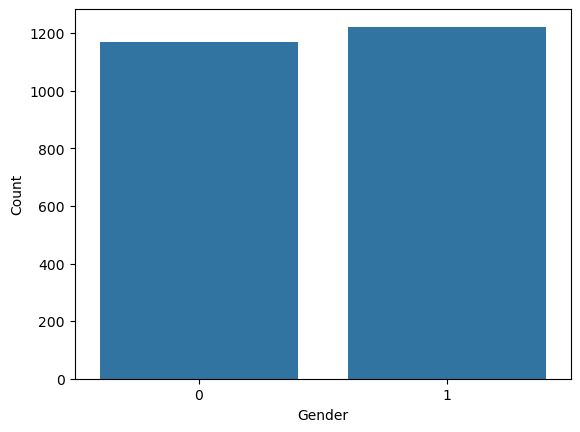

In [203]:
sns.countplot(x =  df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [205]:
group = df.groupby(['Age'])
group['Age'].count()

Age
15    630
16    593
17    587
18    582
Name: Age, dtype: int64

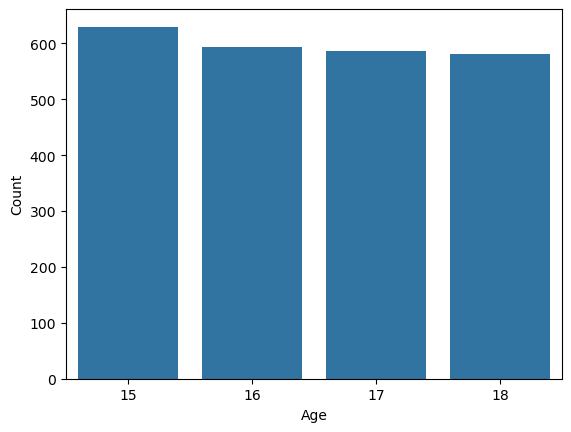

In [207]:
sns.countplot(x =  df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

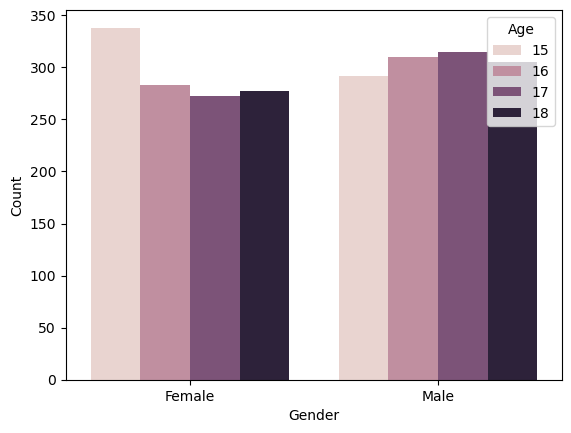

In [209]:
ax = sns.countplot(x = df['Gender'], hue = df['Age'])
ax.set_xticklabels(['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

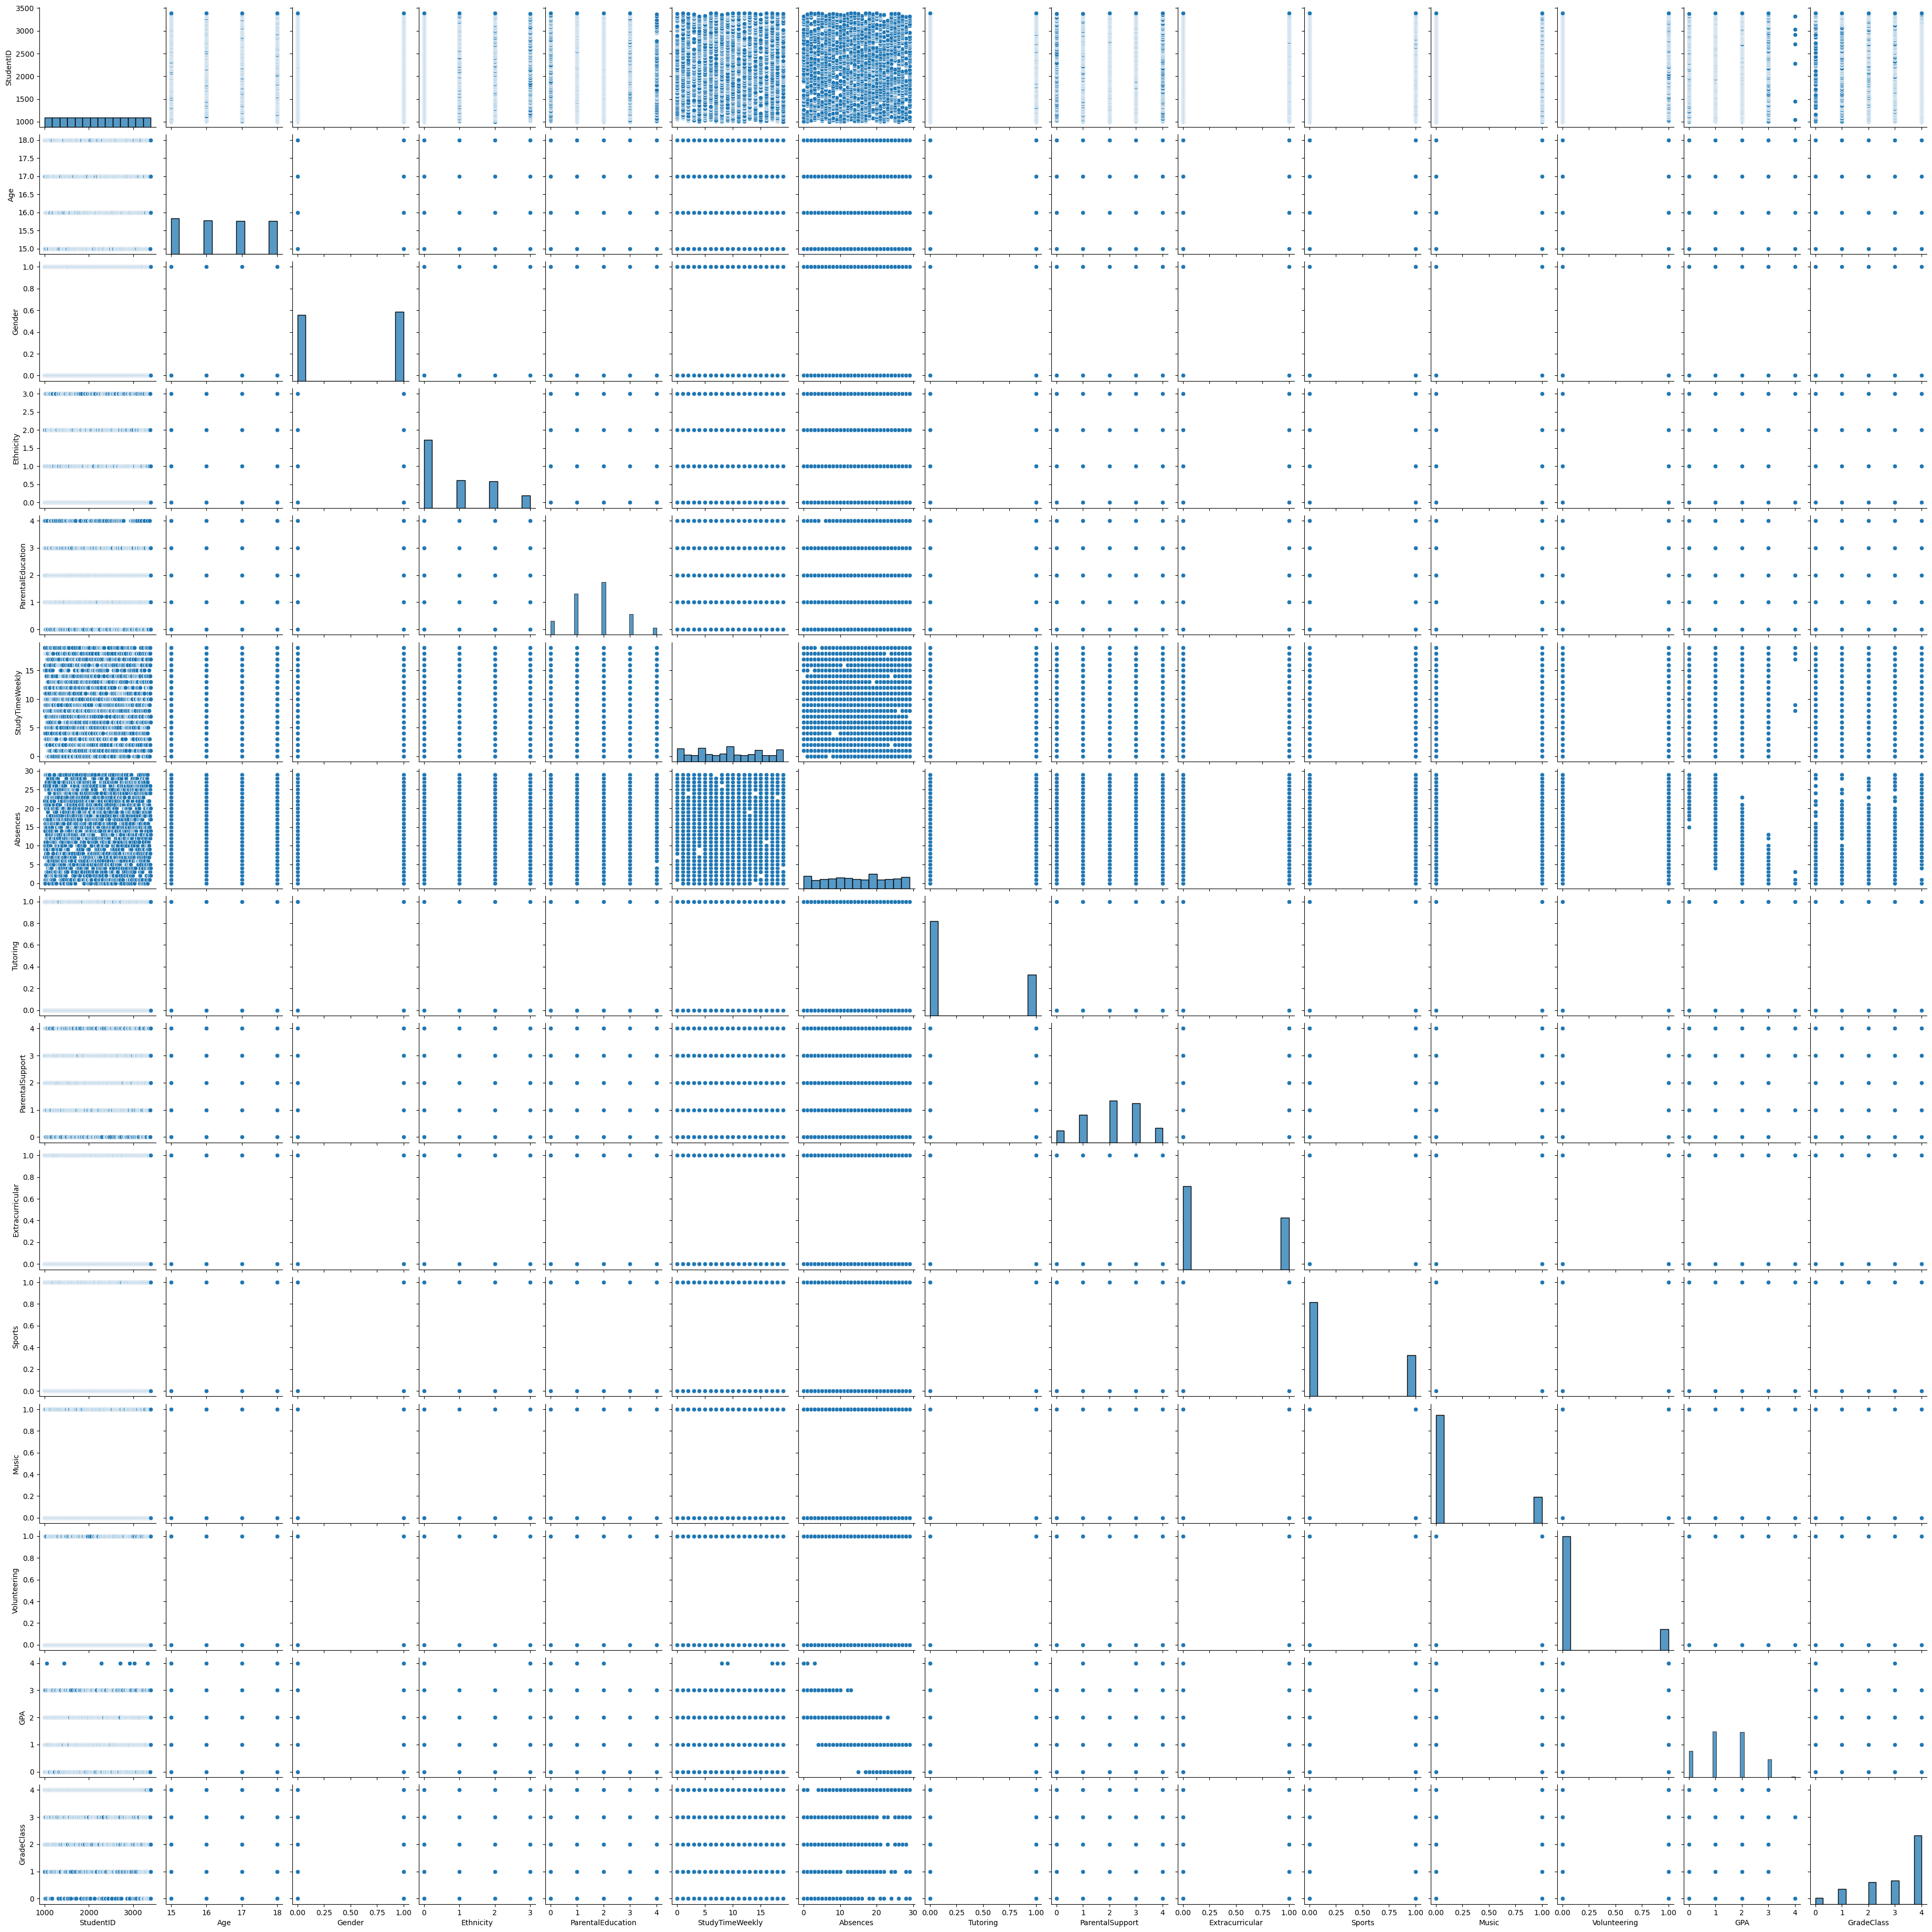

In [120]:
sns.pairplot(df)

In [211]:
categorical_col=['Ethnicity','ParentalEducation','ParentalSupport']
bool_cols = ['Gender', 'Tutoring','Extracurricular','Sports','Music','Volunteering']
numeric_cols = ['StudentID', 'Age', 'StudyTimeWeekly', 'GPA', 'GradeClass','Absences']

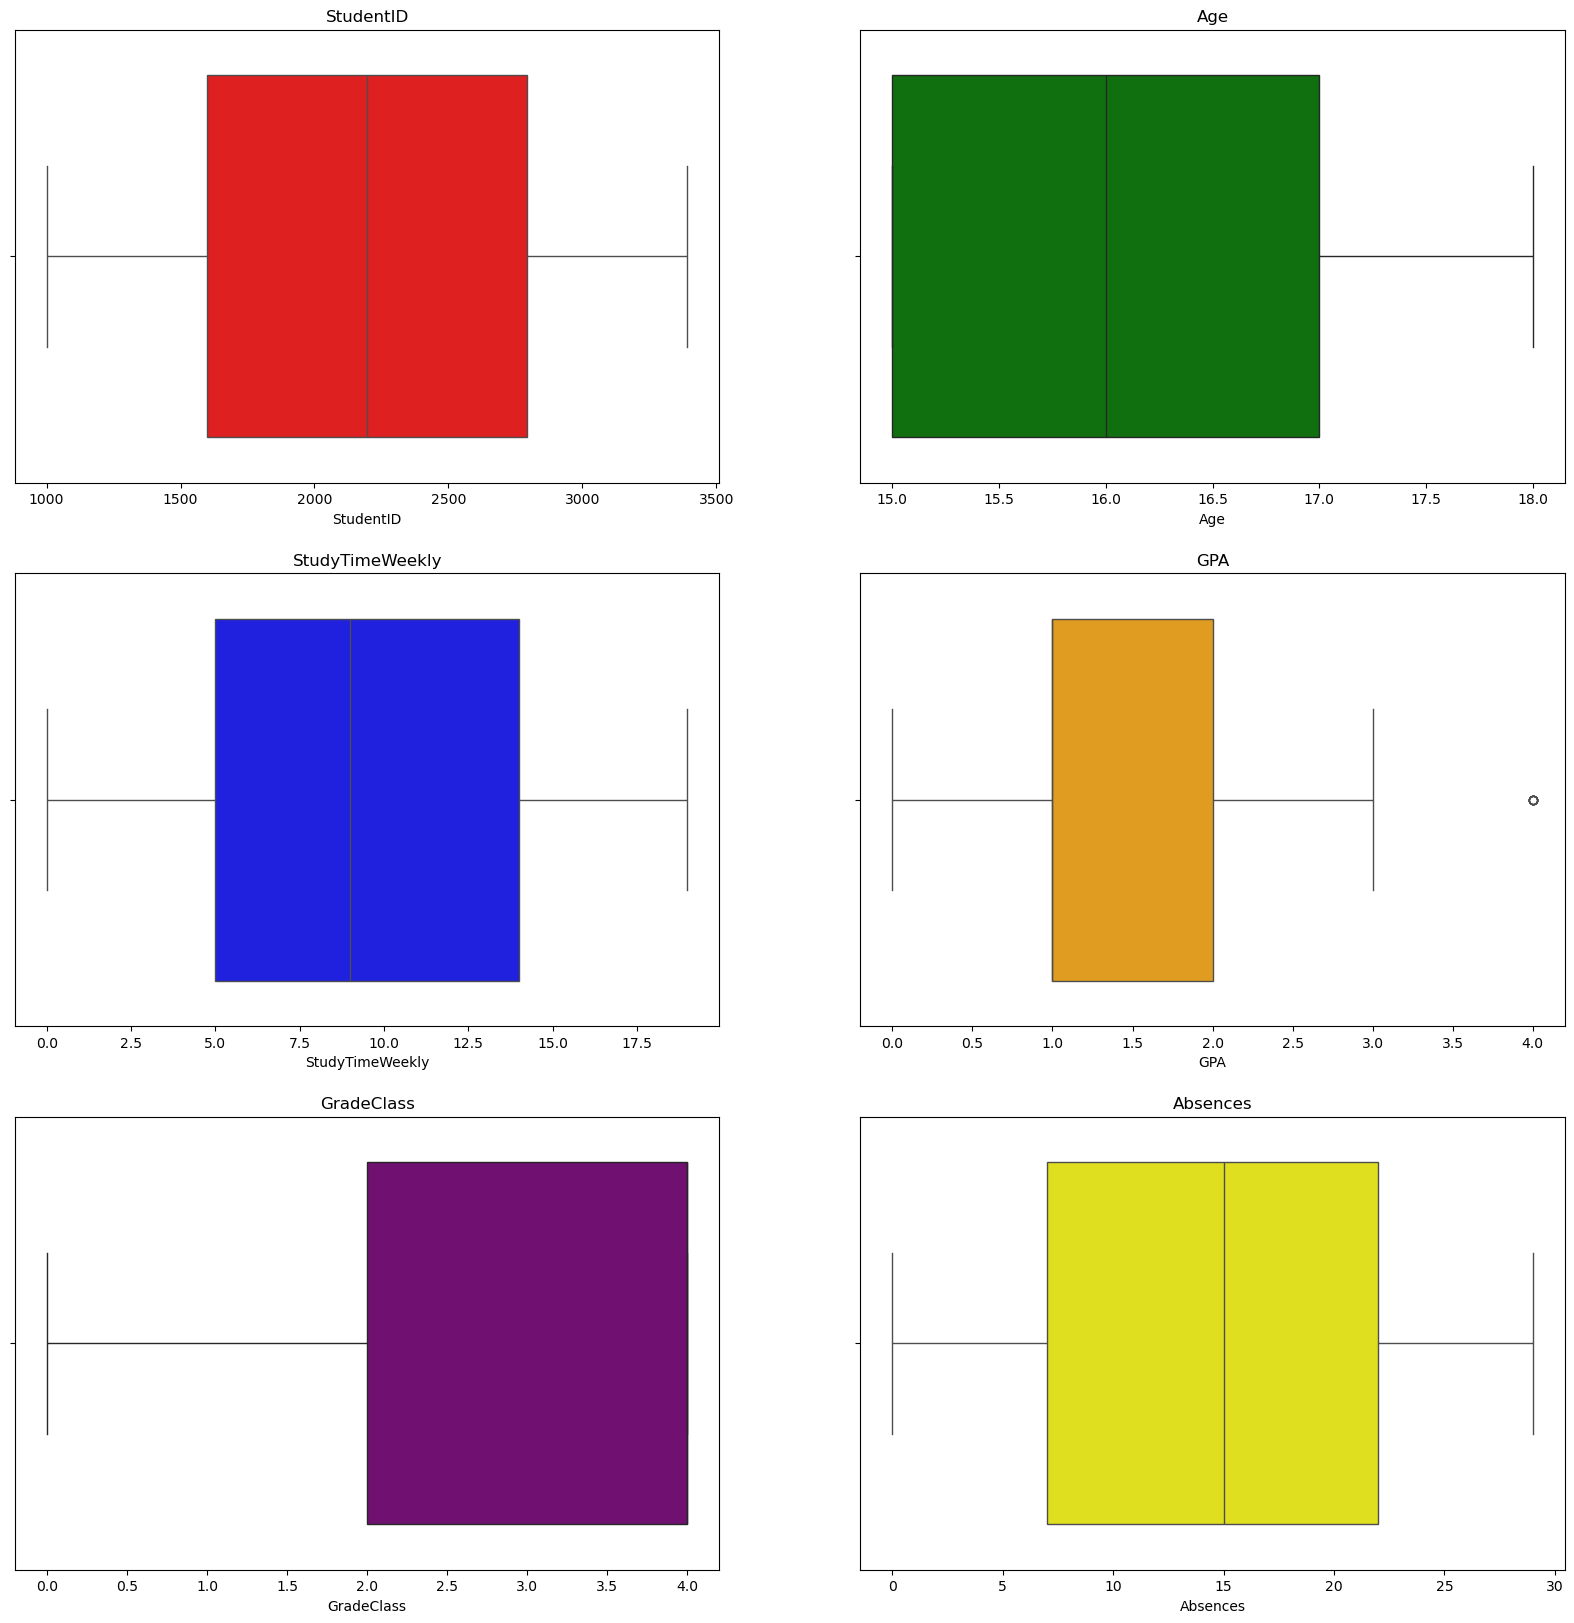

In [213]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple','yellow']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [215]:
X = df.drop(['StudentID','GradeClass'], axis=1)
y = df['GradeClass']
y

0       2
1       1
2       4
3       3
4       4
       ..
2387    0
2388    4
2389    2
2390    1
2391    1
Name: GradeClass, Length: 2392, dtype: int32

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [219]:
scaler = StandardScaler()

In [221]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scale, y_train)

sns.countplot(x = y_train_balanced)

In [226]:
model = LogisticRegression()
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()

In [228]:
model.fit(X_train_scale, y_train)

LogisticRegression()

In [230]:
model1.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [232]:
model2.fit(X_train_scale, y_train)

RandomForestClassifier()

In [234]:
from sklearn.svm import SVC
model3 = SVC()

In [236]:
model3.fit(X_train_scale, y_train)

SVC()

In [238]:
y_pred = model.predict(X_test_scale)
accuracy_score(y_pred, y_test)

0.8308977035490606

In [240]:
y_pred = model.predict(X_train_scale)
accuracy_score(y_pred, y_train)

0.8578149503397805

In [242]:
y_pred1 = model1.predict(X_test_scale)
accuracy_score(y_pred1, y_test)

0.7223382045929019

In [244]:
y_pred1 = model1.predict(X_train_scale)
accuracy_score(y_pred1, y_train)

1.0

In [246]:
y_pred2 = model2.predict(X_test_scale)
accuracy_score(y_pred2, y_test)

0.8183716075156576

In [248]:
y_pred2 = model2.predict(X_train_scale)
accuracy_score(y_pred2, y_train)

1.0

In [250]:
y_pred3 = model.predict(X_test_scale)
accuracy_score(y_pred3, y_test)

0.8308977035490606

In [72]:
y_pred = model.predict(X_test_scale)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.35      0.21        17
           1       0.52      0.48      0.50        58
           2       0.57      0.46      0.51        93
           3       0.49      0.58      0.53        83
           4       0.90      0.84      0.87       228

    accuracy                           0.66       479
   macro avg       0.53      0.54      0.52       479
weighted avg       0.69      0.66      0.67       479



In [252]:
import joblib

In [254]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'student_model.pkl')

['student_model.pkl']

In [86]:
model2.fit(X_train_scale, y_train)

RandomForestClassifier()

In [88]:
y_pred = model2.predict(X_test_scale)
accuracy_score(y_pred, y_test)

0.6805845511482255

In [90]:
y_pred = model2.predict(X_train_scale)
accuracy_score(y_pred, y_train)

1.0